In [2]:
from IPython.display import Image
from IPython.core.display import HTML 

# Temporal Difference Learning Minimizes Cost with Delayed Feedback in Supply Chain Paradigm

## Background

### Delayed Feedback: An example

* When playing a game of tic-tac-toe, the value of any given move is not known until many moves later
* In this scenario, the **feedback for the move is delayed** because the action executed cannot be directly paired with the feedback recieved
* When Temporal Difference Learning is applied, the agent finds the value of actions by **updating the reward values of previous states** with each move made. Through this, the agent learns to select actions that lead to the greatest total reward after multiple rounds

In [7]:
Image(url='https://raw.githubusercontent.com/pbelsey/Neural-Cog-Final-Project/master/td_tictactoe.png', width=500)

### **Temporal Difference (TD) Learning **
* ** A model-free Reinforcement Learning algorithm ** concerned with finding the optimal policy to solve a problem
    * **Model-based** RL requires complete knowledge of the environment, including rewards and their probabilities, to find the optimal policy (ex. dynamic programming)
    * **Model-free** RL estimates rewards and their probabilites (value funtions) by interacting with the environment to determine the optimal policy 
        * ex. Monte Carlo methods and TD
    
* A way to **estimate value functions for a particular policy**
    * **Value functions** estimate how good a particular action will be in a given state, and can be written as:
        * **V(s)**, the value of state, *s*, under a policy, *p*
        * **Q(s,a)**, thae value of action, *a*, in state, *s*, under policy, *p* 
            * Q-value
        
* Value functions are updated at each time step
    * TD uses **"bootstrapping" method**, which allows an estimate of the final reward to be calculated at each state. The state-action value is updated at every step
    * This is **unlike Monte Carlo methods**, where the path taken to reach the final state is traced back and each **value is updated only when the final reward is received**


### TD-Learning Equation: 
$$Q(s_t, a_t) \leftarrow  Q(s_t, a_t) + \alpha (r_{t+1} + \gamma  Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t))$$


* TD-Learning takes the original state-action pair and adds a learning rate modified term of the difference between the discounted value of the new state-action pair and the original state-action pair, in addition to a new reward prediction 
     * the value of the original state-action **increases** if the value of the new state-action is **greater**
     * the value of the original state-action **decreases** if the value of the new state-action is **less**
     
* The **discount factor**, $\gamma$, serves as a way to weight estimates based on their placement in time   
     * 0 < $\gamma$ < 1, where $\gamma$ values closer **1** place **greater value on future rewards** 
     * values closer to **0** place **greater value on immediate rewards**
* Softmax action selection policy:
    * Actions are weighted according to their action-value estimate
    

* By maintaing the same state, the model can be simplified to:

$$Q(a_t) \leftarrow  Q(a_t) + \alpha (r_{t+1} + \gamma  Q(a_{t+1}) - Q(a_t))$$

### TD Compared to Q-Learning:

* TD-Learning as On or Off Policy
    * **On-Policy** learning requires value functions to be updated through experience
        * Methods estimate the total future reward for state-action pairs assuming the current policy is followed
        * ex. State–action–reward–state–action **(SARSA)**
    * **Off-Policy** methods update value functions using hypothetical actions, those which have not actually been tried
        * Estimates the total future reward for state-action pairs assuming a greedy policy, even if a greedy policy was not used
        * ex. **Q-Learning**
        
#### Q-Learning Equation
$$Q(a) \leftarrow  Q(a) + \alpha (r + \gamma  max_\alpha Q(a_{t+1})- Q(a))$$

where ** $max_\alpha$ is the maximum reward attainable** in the new state and ** $\gamma$ is set below 0** so the algorithm converges to the action-value function for a target policy

simplifies to: 

$$Q(a_i) \leftarrow  Q(a_i) + \alpha (r_t - Q(a_i))$$

As TD-Learning is a more general form of Q-Learning, we can broaden the above Q-Learning model to execute a **learning process employing delayed feedback by creating a SARSA model.**
* This will allow us to use not necessarily the maximum reward to update Q-values, but to **select a new action (and therefore new reward) under the same policy as the original action**
* Because this form takes the action selection method into account when learning, it may not arrive at the most optimal policy (learns a near optimal policy)
    * Could result in **greater overall reward** because SARSA **updates value functions only through experience** and not based on what is assumed to be an optimal policy  
        * A more conservative approach

$$Q(a_t) \leftarrow  Q(a_t) + \alpha (r_{t+1} + \gamma  Q(a_{t+1}) - Q(a_t))$$



### **The Beer Game**

**“The Beer Game”** is a dynamic system scenario, with a supply chain with five levels ranging from consumer to factory. The goal is to match the demand of buyer exactly, so that unsold products and backorders are minimized and difference between supply and demand is equal to 0 

**Delays in the system** prevent ideal behavior. 

In [3]:
Image(url='https://raw.githubusercontent.com/pbelsey/Neural-Cog-Final-Project/master/beer-game-large.png', width=800)

### **Our Beer Game**

* Consists of a supply chain containing:
    - Consumer (C), Store (S), Warehouse (W), and Factory (F) 

* For the Warehouse, a case of beer costs: 
    - \$0.50 to store, and \$1 when backordered 

* Orders from the Factory must be placed:
     - 1 week ahead of time, as they take 1 week to deliver. Therefore, the Warehouse must learn to predict the Store's needs 1 week beforehand

**Q-Agent Warehouse learns the optimal number of cases of beer to order** to supply for the Store, **in order to minimize costs**
   * costs are used to update Q-values
    
* The agent uses a Softmax Policy in order to pick actions from the state - action space


In [6]:
Image(url='https://raw.githubusercontent.com/pbelsey/Neural-Cog-Final-Project/master/SupplyChainz.png', width=1000)

# Problem: The Credit Assignment Problem  

### How do we assign credit to an action when many decisions contribute to the action?

* A **reward signal only weakly affects the temporally distant states** that preceded it 
    * Many iterative steps must be performed to propagate a reward signal so that it effects states and actions
        * Errors are backpropagated, and through **many adjustments of the values of actions, a near optimal policy is converged on**
* In the Beer Game, after many rounds the Warehous Q-Agent will learn the most rewarding number of cases to order so that backorders and overstock are near 0
* SARSA method enables rewards to be maximized (through cost minimization), without incurring unnecessary costs that could result from Q-learning and assumption of greedy policy 



# Model: From Q to TD - Learning

In [2]:
from __future__ import division
import ADMCode
from ADMCode import visualize as vis
from ADMCode import believer_skeptic

import numpy as np
from numpy.random import sample as rs
import pandas as pd
import sys
import os

# from ipywidgets import interactive
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import tdlearn as td 

# Temporary for now until push changes to PIP 
#sys.path.insert(0,'../ADMCode')
#import believer_skeptic

warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore")
sns.set(style='white', font_scale=1.3)



%matplotlib inline

### **Hypothesis:**
** An agent will learn to maintain a net inventory at 0 in fewer time-steps when: **
   * 
       * 
           * $\alpha$ is higher
           * $\beta$ is lower
           * $\gamma$ is lower

* **High learning rate** may be optimal because the value of certain actions will change depending on the environment
* **Liberal strategy**  (low $\beta$), the agent may be more likely to explore the option of ordering lower stock, even though it may seem counterintuitive towards the goal reducing the cost of backorders at a particular time-step
* **Lower discount rate** will help the agent integrate the feedback despite the effect of time delays

### **Testing:**
* The hypotheses will be tested by choosing **low, medium, and high values of $\alpha, $\beta,$ and $\gamma$** for the Warehouse Q - Agent
* Other suppliers will be programmed to meet **consumer demand** for each week, which **will be held constant**. The **fees** for backorders and excess units will also be **held constant.**

# Results: 

**1. High learning rate, high exploitativeness, high discount rate**

$\alpha$ = 0.1, $\beta$ = 8, $\gamma$ = 0.9 

Optimal Choice: 200.00
Optimal Choice: 200.00


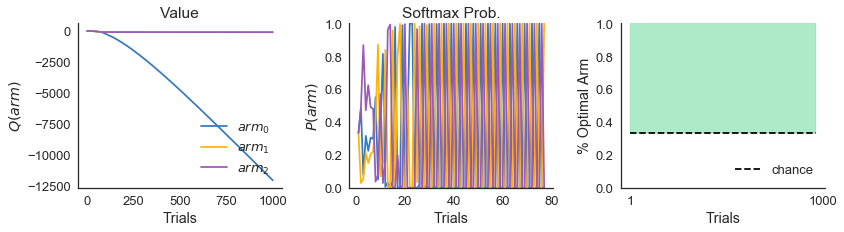

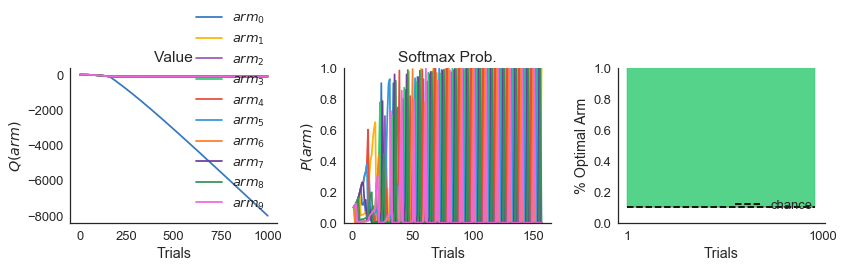

In [47]:
td1 = td.TDagent(lowbound=0, highbound=3, demand=2, alpha=0.1, beta=8, gamma=0.9)
data1 = td1.play_beergame(ntrials=1000,get_output=True)
vis.plot_qlearning(data1)

td2 = td1 = td.TDagent(lowbound=0, highbound=10, demand=2, alpha=0.1, beta=8, gamma=0.9)
data1 = td1.play_beergame(ntrials=1000,get_output=True)
vis.plot_qlearning(data1)

**2. Low learning rate, high exploitativeness, high discount rate**

$\alpha$ = 0.025, $\beta$ = 8, $\gamma$ = 0.9

Optimal Choice: 200.00


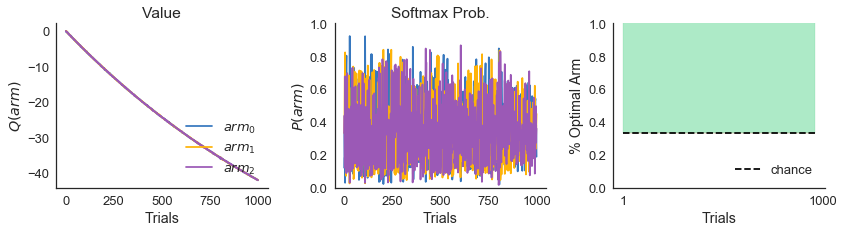

In [32]:
td1 = td.TDagent(lowbound=0, highbound=3, demand=2, alpha=0.025, beta=8, gamma=0.9)
data1 = td1.play_beergame(ntrials=1000,get_output=True)
vis.plot_qlearning(data1)

**3. Low learning rate, low exploitativeness, high discount rate**

$\alpha$ = 0.025, $\beta$ = 1, $\gamma$ = 0.9

Optimal Choice: 200.00


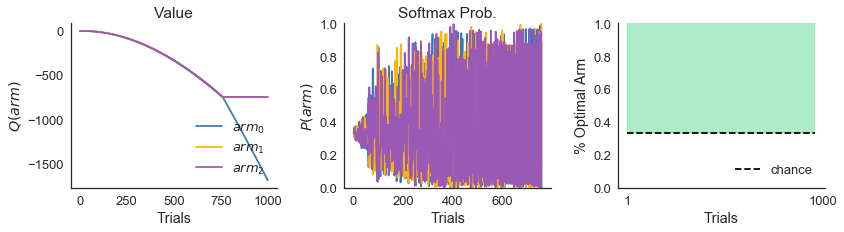

In [50]:
td1 = td.TDagent(lowbound=0, highbound=3, demand=2, alpha=0.025, beta=1, gamma=0.9)
data1 = td1.play_beergame(ntrials=1000,get_output=True)
vis.plot_qlearning(data1)

**4. High learning rate, low exploitativeness, high discount rate**

$\alpha$ = 0.1, $\beta$ = 1, $\gamma$ = 0.9

Optimal Choice: 200.00


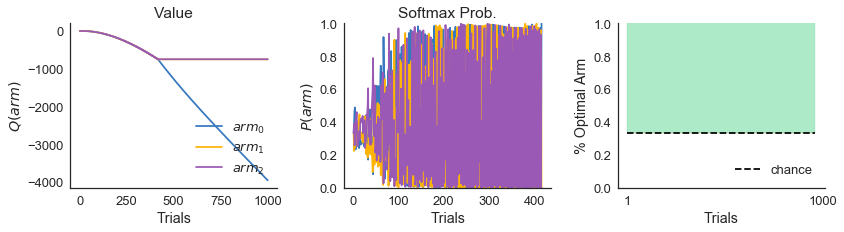

In [51]:
td1 = td.TDagent(lowbound=0, highbound=3, demand=2, alpha=0.1, beta=1, gamma=0.9)
data1 = td1.play_beergame(ntrials=1000,get_output=True)
vis.plot_qlearning(data1)

**5. High learning rate, high exploitativeness, low discount rate**

$\alpha$ = 0.1, $\beta$ = 8, $\gamma$ = 0.1 

Optimal Choice: 200.00


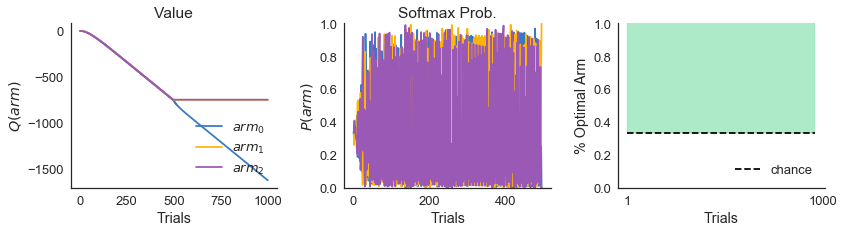

In [38]:
td1 = td.TDagent(lowbound=0, highbound=3, demand=2, alpha=0.1, beta=8, gamma=0.1)
data1 = td1.play_beergame(ntrials=1000,get_output=True)
vis.plot_qlearning(data1)

**6. High learning rate, low exploitativeness, low discount rate**

$\alpha$ = 0.1, $\beta$ = 8, $\gamma$ = 0.1 

Optimal Choice: 200.00


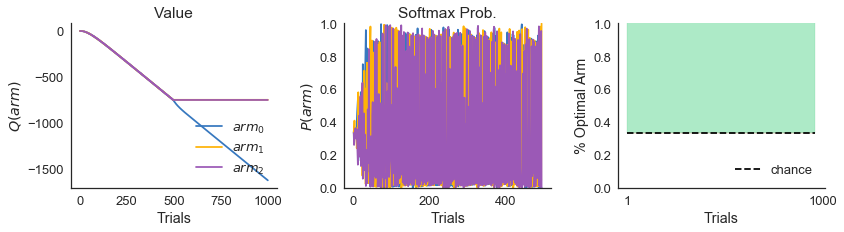

In [39]:
td1 = td.TDagent(lowbound=0, highbound=3, demand=2, alpha=0.1, beta=1, gamma=0.1)
data1 = td1.play_beergame(ntrials=1000,get_output=True)
vis.plot_qlearning(data1)

**7. Low learning rate, low exploitativeness, low discount rate**

$\alpha$ = 0.025, $\beta$ = 8, $\gamma$ = 0.1 

Optimal Choice: 200.00


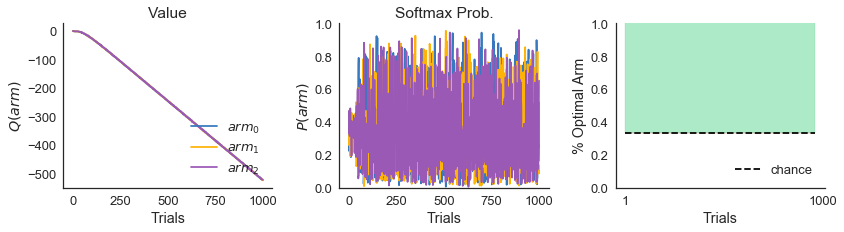

In [55]:
td1 = td.TDagent(lowbound=0, highbound=3, demand=2, alpha=0.1, beta=1, gamma=0.1)
data1 = td1.play_beergame(ntrials=1000,get_output=True)
vis.plot_qlearning(data1)

**8. High learning rate, low exploitativeness, low discount rate**

$\alpha$ = 0.1, $\beta$ = 8, $\gamma$ = 0.1 

Optimal Choice: 200.00


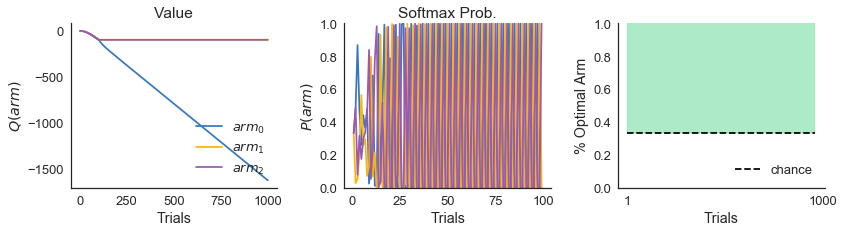

In [44]:
td1 = td.TDagent(lowbound=0, highbound=3, demand=2, alpha=0.1, beta=8, gamma=0.1)
data1 = td1.play_beergame(ntrials=1000,get_output=True)
vis.plot_qlearning(data1)

# Conclusions 

In [ ]:
hypothesis analysis